In [1]:
library(ggplot2)
library(tidyverse)
library(GGally)
library(ggpubr)
library(kernlab)

NameError: name 'library' is not defined

In [ ]:
music1_scale=read.csv("music_scale.csv")

In [2]:
head(music1_scale)

NameError: name 'head' is not defined

In [ ]:
dim(music1_scale)

[1] 4355   16

In [ ]:
# select continous variable
x=music1_scale[,c(2:12)]
x=as.matrix(x)

In [ ]:
# transform categorical variables to factors
music1_scale$key=as.factor(music1_scale$key)
music1_scale$mode=as.factor(music1_scale$mode)
music1_scale$time_signature=as.factor(music1_scale$time_signature)
music1_scale$class=as.factor(music1_scale$class)

In [ ]:
head(x)

Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in.min.ms
0.5173245,-0.7916989,0.5858404,0.2735142,-0.4396910,-0.6945814,-0.5543811,-0.5756962,0.4418885,-0.20641714,0.3037690
0.4558726,-2.0851779,1.2108508,0.8697722,1.8786416,-0.6974674,-0.5151872,-0.1401598,-1.5441462,2.55137603,0.1268299
-0.7117127,-0.3104043,-1.1222626,-0.7042195,-0.5388215,2.2438756,2.4442869,-0.3916667,-1.2020421,0.01008395,-1.7419137
1.8692654,0.8386864,-0.5593650,-0.3193088,-0.3194126,0.5605945,-0.4996264,-0.5756962,1.4948364,-0.79302324,-0.4929571
-0.8960683,0.3032462,0.5353737,0.7786464,-0.3511344,-0.6907684,-0.5420945,-0.7842629,-0.2573023,-0.58847395,-0.4880812
-1.0189720,1.7531460,-0.8349908,-0.1754472,0.5040317,-0.5113734,-0.5673750,-0.5020844,1.2992295,1.24796271,-0.6204869


In [ ]:
x.pca_cov = prcomp(x,scale=FALSE)
summary(x.pca_cov)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8684 1.2461 1.02760 1.01463 0.96199 0.91587 0.83811
Proportion of Variance 0.3173 0.1411 0.09597 0.09357 0.08411 0.07624 0.06384
Cumulative Proportion  0.3173 0.4584 0.55439 0.64795 0.73206 0.80830 0.87215
                           PC8     PC9    PC10    PC11
Standard deviation     0.76486 0.66230 0.51904 0.33713
Proportion of Variance 0.05317 0.03987 0.02449 0.01033
Cumulative Proportion  0.92532 0.96518 0.98967 1.00000

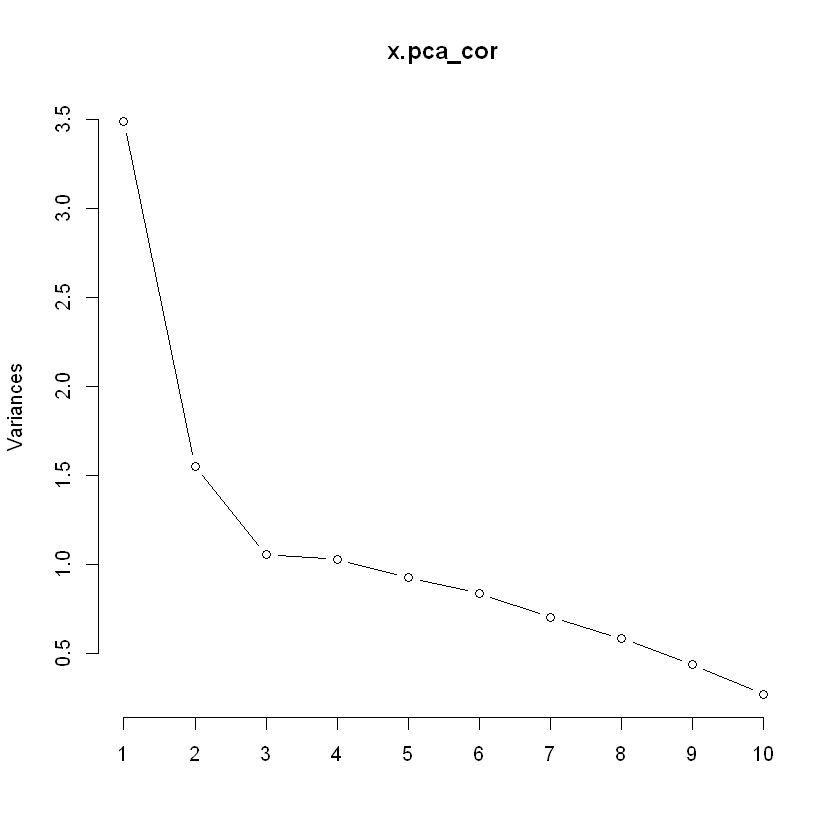

In [ ]:
screeplot(x.pca_cor,type = 'l')

According to the summary and scree plot, we can observe that many of the principal components explain a considerable amount of variance. However, we do not need to keep all of these components. In general, it is a good rule of thumb to preserve around 80% of the variance. Therefore, in this instance, we can select the 6 most important principal components to contribute to explain 80% variance.

In [ ]:
x_pca_cov = princomp(x,cor=F)
x_pca_cov$loadings


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Popularity                 0.297  0.514  0.149  0.563  0.500         0.214
danceability        0.107  0.665 -0.176        -0.146         0.179       
energy              0.478 -0.138                             -0.327  0.137
loudness            0.471                                    -0.302       
speechiness         0.109  0.263 -0.446 -0.509  0.540 -0.262         0.162
acousticness       -0.459  0.141                       0.114  0.179 -0.146
instrumentalness   -0.359 -0.171        -0.152 -0.143        -0.204  0.836
liveness            0.114 -0.243 -0.645  0.122         0.682              
valence             0.263  0.389               -0.556  0.255  0.124  0.219
tempo               0.156 -0.258  0.260 -0.694         0.179  0.516       
duration_in.min.ms  0.269 -0.227         0.428  0.139 -0.307  0.639  0.359
                   Comp.9 Comp.10 Comp.11
Popularity                               
dance

PC1:

PC1=0.107 * danceability+0.478 * energy+ 0.471 * loudness +0.109 * speachness -0.459 * acousticness -0.359 * instrumentalness + 0.114 * liveness + 0.263* valence + 0.199 * tempo + 0.269 * duration_in.min.ms

We can observe that PC1 focus on the difference between the sum of energy, loudness and the sum of acousticness and instrumentalness.

We can regard the sum of energy and loudness as how fast, loud, and noisy of the music feels like,and the sum of acousticness and instrumentalness can be interpretted as the probability that the music contains no vocals as a pure music, therefore, PC1 is a measure of the level of the volume, the intensity and activity of the music.

PC2:

we can see that it focus on danceability and valence,which describes musical attributes such as rhythm, beat strength, and overall musical positiveness conveyed by a music, and also consider the duration of the song.

PC3:

focus on the difference between popularity, also negetive score of the sum of speechiness and liveness,which indicate the presence of an audience and his spoken words in the recording music. 

PC4:

mainly focus on difference between duration and tempo, and also speechiness, we can refer that music species earning high score of PC4 are more likely to be long songs with low pace or speed with some amount of spoken words contained.

PC5:

reveal the difference between speechiness and valence,and also pay attention to popularity.

PC6：

mianly reveal the level of liveness and popularity of the music,liveness detects the presence of an audience in the recording, so PC5 focus on the vitality of the musician, and how much he is welcomed by the audience.

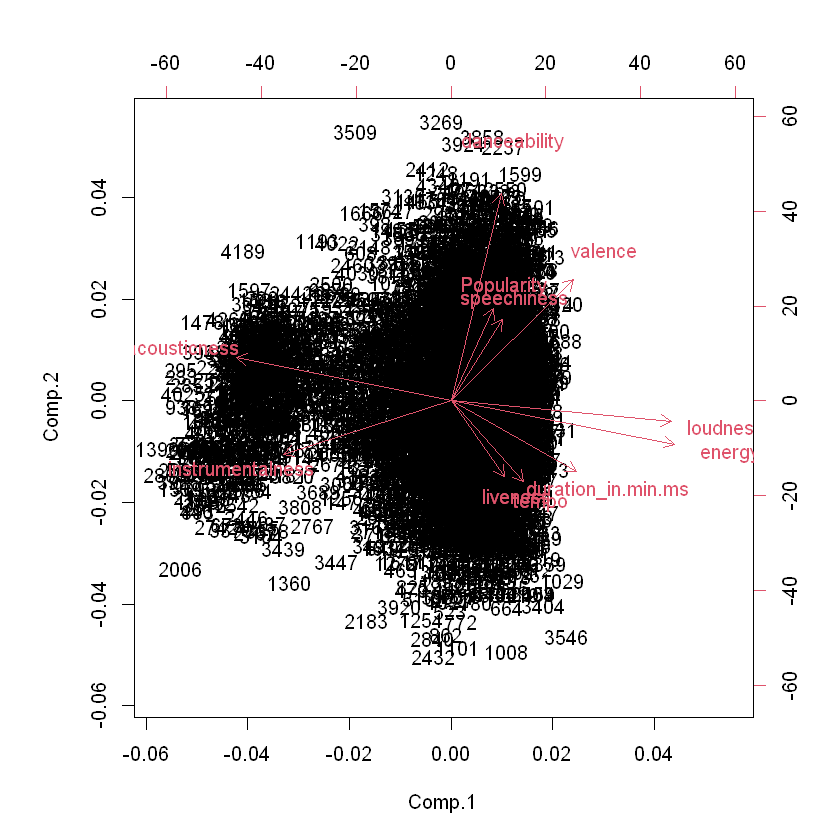

In [ ]:
x_pca_cov = princomp(x,cor=F)
plt1=biplot(x_pca_cov)

PC1 and PC2 above are very informative and reveals some structure in the data and relationships between variables,thus they are informative and rational.

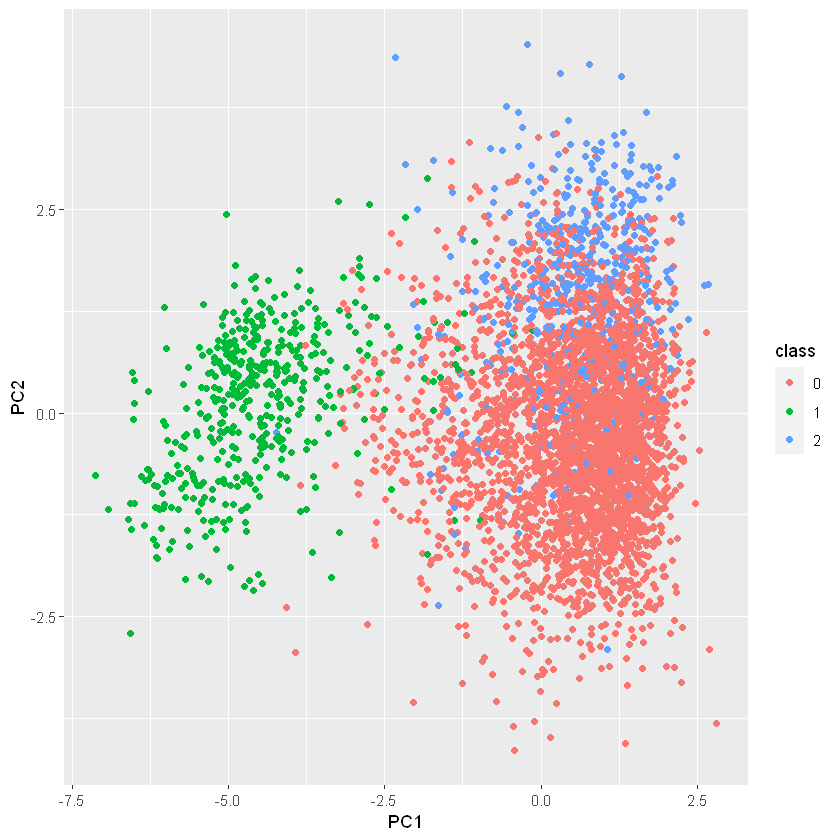

In [ ]:
# Data Projection on the First Two PCs
pca_projections <- as.data.frame((x_pca_cov$scores)[, 1:2])
colnames(pca_projections) <- c("PC1", "PC2")
pca_projections <- cbind(pca_projections, class = music1_scale[, c("class")])
ggplot(data = pca_projections) + 
  geom_point(aes(x = PC1, y = PC2, col = class))

From the plot we can observe three clusters based on PC1 and PC2, most of the musics have low PC1 score are tend to from class 1. For musics with larger PC1 score, they can also be splitted into two groups: class 1 with higher PC2 and class 0 with lower PC2 score. However, when PC2 is at a medium level with high PC1, class 0 and class 1 are hard to seperate form the plot, the boundry between them is fuzzy.

PC1 and PC2 can perform well to split classes of musics.

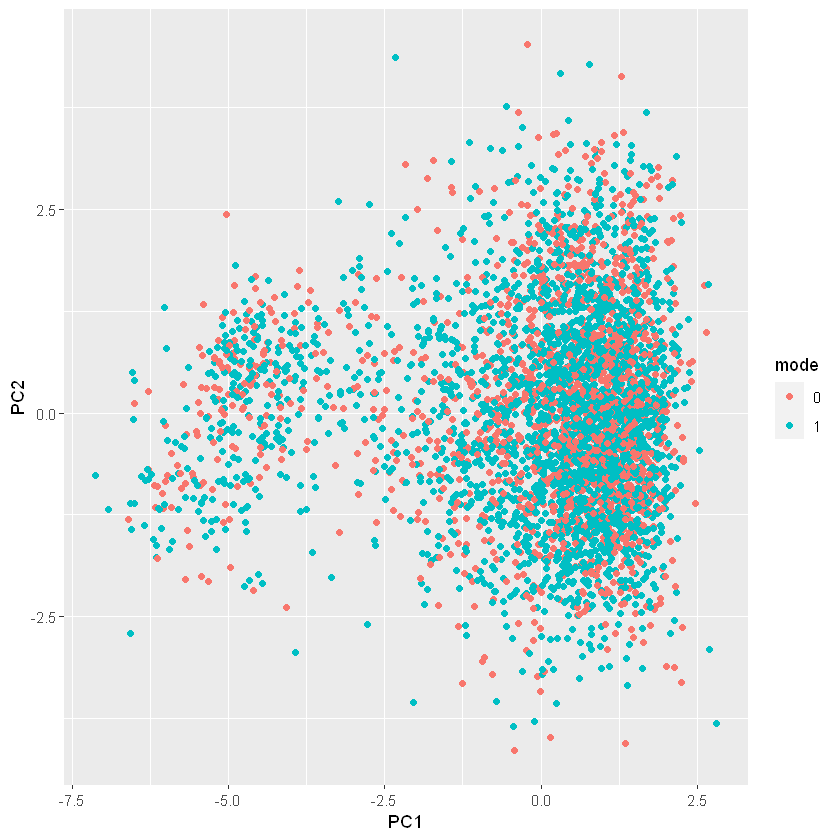

In [ ]:
pca_projections <- as.data.frame((x_pca_cov$scores)[, 1:2])
colnames(pca_projections) <- c("PC1", "PC2")
pca_projections <- cbind(pca_projections, mode = music1_scale[, c("mode")])
ggplot(data = pca_projections) + 
  geom_point(aes(x = PC1, y = PC2, col = mode))

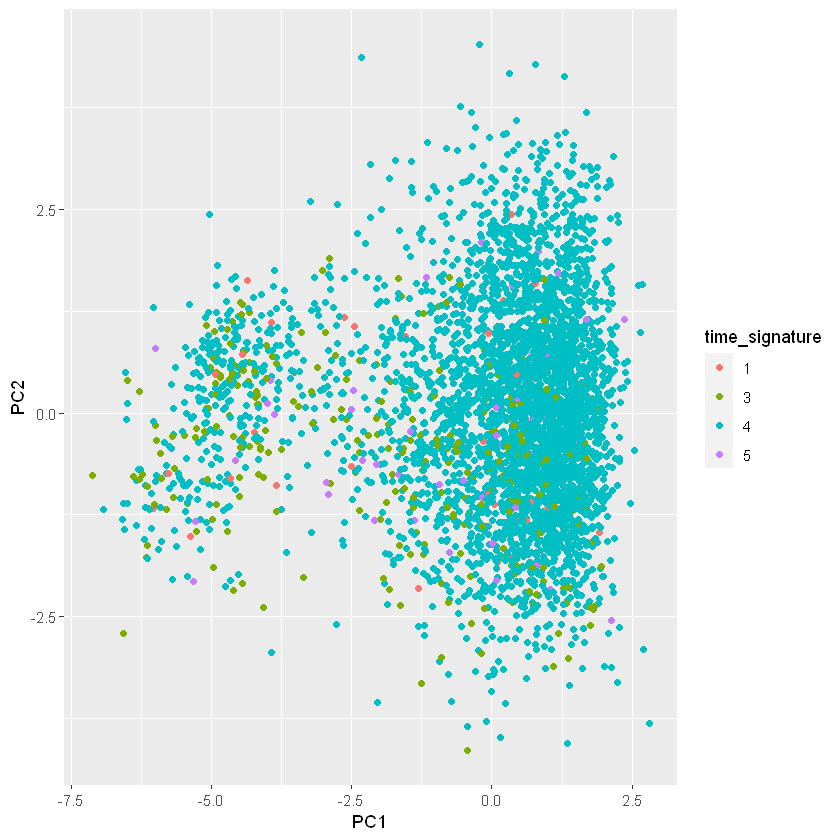

In [ ]:
pca_projections <- as.data.frame((x_pca_cov$scores)[, 1:2])
colnames(pca_projections) <- c("PC1", "PC2")
pca_projections <- cbind(pca_projections, time_signature = music1_scale[, c("time_signature")])
ggplot(data = pca_projections) + 
  geom_point(aes(x = PC1, y = PC2, col = time_signature))

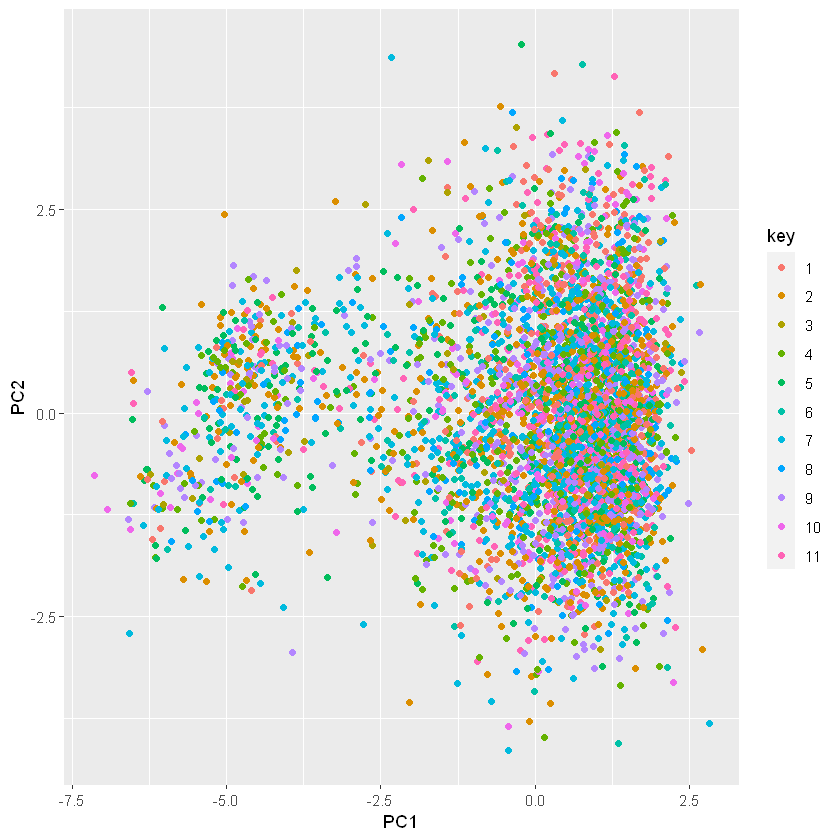

In [ ]:
pca_projections <- as.data.frame((x_pca_cor$scores)[, 1:2])
colnames(pca_projections) <- c("PC1", "PC2")
pca_projections <- cbind(pca_projections, key = music1_scale[, c("key")])
ggplot(data = pca_projections) + 
  geom_point(aes(x = PC1, y = PC2, col = key))

Above all, PC1 and PC2 cannot perform well in seperating the levels of key,time_signature and mode.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4924ded-6215-4237-94b8-cc94e30e18e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>